<a href="https://colab.research.google.com/github/aninda1994/Cotton-Diseases/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
!pip install  tensorflow==2.2.0

     |████████████████████████████████| 516.2MB 31kB/s 
     |████████████████████████████████| 460kB 50.4MB/s 
     |████████████████████████████████| 3.0MB 53.3MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
from tensorflow.keras.layers import Dense, Lambda, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/My Drive/Colab Notebooks/data-20200823T045830Z-001/data/train'
test_path = '/content/drive/My Drive/Colab Notebooks/data-20200823T045830Z-001/data/val'

In [ ]:
import tensorflow
vgg_19 = tensorflow.keras.applications.VGG19(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg_19.layers:
  layer.trainable = False


In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/data-20200823T045830Z-001/data/train/*')

In [ ]:
x = Flatten()(vgg_19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs = vgg_19.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/.255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1/.255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/data-20200823T045830Z-001/data/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/data-20200823T045830Z-001/data/val',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [ ]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set),
    epochs = 20
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 1033s 17s/step - loss: 22.5249 - accuracy: 0.7371 - val_loss: 7.1662 - val_accuracy: 0.8735
Epoch 2/20
61/61 [==============================] - 38s 626ms/step - loss: 6.7940 - accuracy: 0.8903 - val_loss: 5.7378 - val_accuracy: 0.9259
Epoch 3/20
61/61 [==============================] - 38s 624ms/step - loss: 4.9465 - accuracy: 0.9190 - val_loss: 10.1945 - val_accuracy: 0.9043
Epoch 4/20
61/61 [==============================] - 38s 627ms/step - loss: 4.0362 - accuracy: 0.9416 - val_loss: 7.3428 - val_accuracy: 0.9228
Epoch 5/20
61/61 [==============================] - 38s 617ms/step - loss: 5.5828 - accuracy: 0.9272 - val_loss: 7.9593 - val_accuracy: 0.9074
Epoch 6/20
61/61 [==============================] - 38s 617ms/step - loss: 4.2124 - accuracy: 0.9370 - val_loss: 6.8781 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 37s 613ms/st

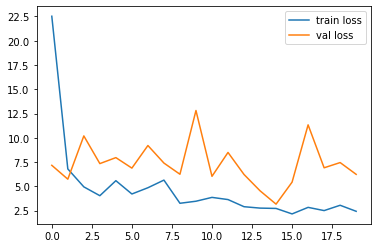

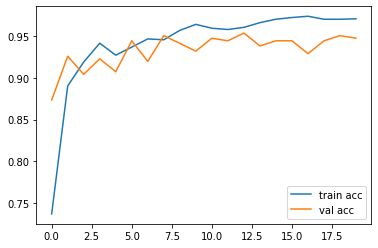

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_vgg19_C.h5')

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
!python -V


Python 3.6.9


In [ ]:
!pip freeze > requirements.txt